# Computing the area of the Mandelbrot set
### Q1. implement the iteration and create colourful pictures of the fractal

In question 1 we define the function `mendelbrot_set` and give the plot of the estimate aera $A_M$ of the Mandelbrot set.

From the image, the color bar on the right indicates the number of iterations. The central region, which is usually black or a darker shade, represents the points that belong to the Mandelbrot set. As the color temperature increases, so does the number of iterations, indicating that the corresponding complex points escape to infinity at a faster rate. The edges of the image, particularly the areas in red and yellow, represent points where the number of iterations is close to or has reached the set maximum limit.


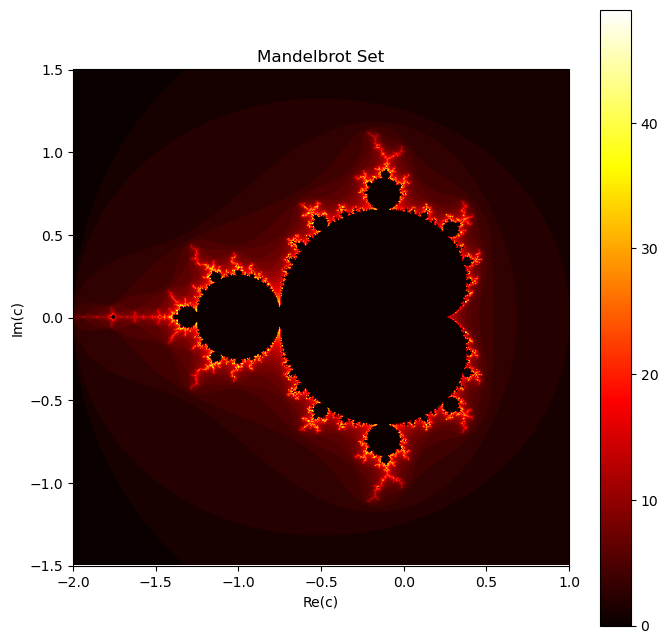

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set the image width and height
width, height = 800, 800

# Define the function to generate the Mandelbrot set image
def mandelbrot_set(width, height, x_min, x_max, y_min, y_max, max_iter):
    # Create a black image
    image = np.zeros((height, width))
    # Generate a grid of complex numbers (the Mandelbrot set is defined in the complex plane)
    real_values = np.linspace(x_min, x_max, width)
    imaginary_values = np.linspace(y_min, y_max, height)
    # For every point in the grid, perform the Mandelbrot iteration
    for x in range(width):
        for y in range(height):
            c = complex(real_values[x], imaginary_values[y])
            z = 0
            for i in range(max_iter):
                z = z*z + c
                if (z.real*z.real + z.imag*z.imag) >= 4:
                    image[y, x] = i
                    break
    return image

# Generate the Mandelbrot set image with 100 iterations
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5
max_iter = 100

image = mandelbrot_set(width, height, x_min, x_max, y_min, y_max, max_iter)

# Display the generated image
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='hot', extent=[x_min, x_max, y_min, y_max])
plt.colorbar()
plt.title('Mandelbrot Set')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.show()


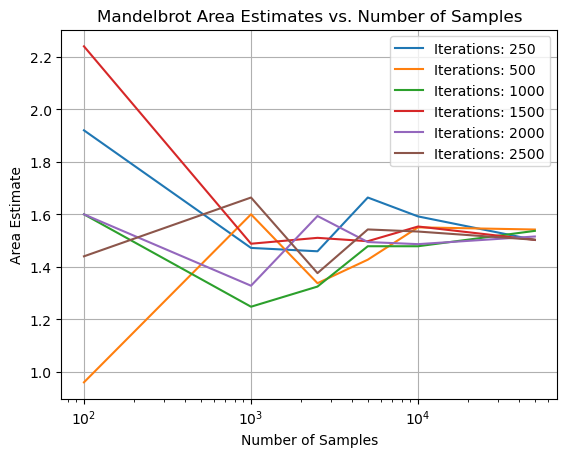

In [5]:

# Step 1: Define a function to check if a point is in the Mandelbrot set
def is_in_mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        z = z*z + c
        if abs(z) > 2:
            return False, n  # The sequence is unbounded
    return True, max_iter  # The sequence is presumed to be bounded

# Step 2: Implement the Monte Carlo method to estimate the area of the Mandelbrot set
def monte_carlo_mandelbrot_area(iterations, samples, x_min=-2, x_max=2, y_min=-2, y_max=2):
    # Count the points inside the Mandelbrot set
    count_inside = 0
    # Record the iteration counts for points inside the Mandelbrot set
    iterations_to_escape = []
    
    # Area of the sample region
    sample_area = (x_max - x_min) * (y_max - y_min)
    
    for _ in range(samples):
        # Random point in the sample region
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(y_min, y_max)
        c = complex(x, y)
        
        # Check if the point is in the Mandelbrot set
        in_set, iter_count = is_in_mandelbrot(c, iterations)
        if in_set:
            count_inside += 1
            iterations_to_escape.append(iter_count)
    
    # Estimate the Mandelbrot set area
    estimated_area = count_inside / samples * sample_area
    
    return estimated_area, np.mean(iterations_to_escape), np.std(iterations_to_escape)

# Given lists of iterations and samples
iterations_list = [250, 500, 1000, 1500, 2000, 2500]
samples_list = [100, 1000, 2500, 5000, 10000, 50000]

# Step 3: Analyze the convergence by running the estimation for different combinations of iterations and samples
# We will store results in a nested dictionary format {iterations: {samples: result}}
results = {}

for iterations in iterations_list:
    results[iterations] = {}
    for samples in samples_list:
        area_estimate, mean_iterations, std_iterations = monte_carlo_mandelbrot_area(iterations, samples)
        results[iterations][samples] = {
            'area_estimate': area_estimate,
            'mean_iterations': mean_iterations,
            'std_iterations': std_iterations
        }

results  # This will output a summary of results for now. We will need to format it for better readability.
import matplotlib.pyplot as plt

# We will create a plot for each number of iterations
for iterations in iterations_list:
    sample_sizes = []
    area_estimates = []
    for samples in samples_list:
        sample_sizes.append(samples)
        area_estimates.append(results[iterations][samples]['area_estimate'])

    plt.plot(sample_sizes, area_estimates, label=f'Iterations: {iterations}')

# Add plot title and labels
plt.title('Mandelbrot Area Estimates vs. Number of Samples')
plt.xlabel('Number of Samples')
plt.ylabel('Area Estimate')
plt.legend()
plt.xscale('log')  # Use logarithmic scale for better visibility
plt.grid(True)
plt.show()


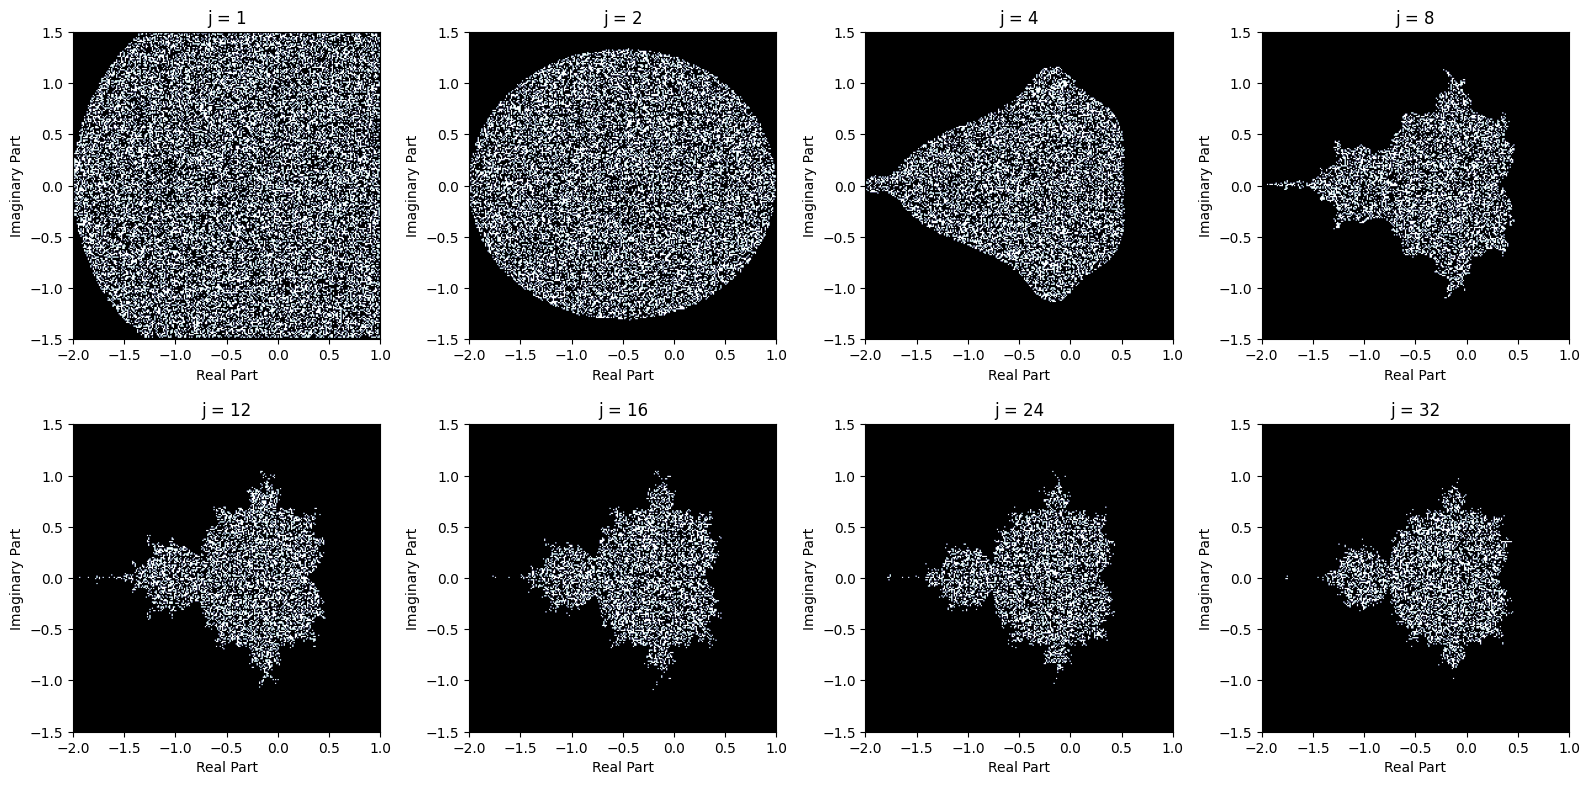

In [ ]:
def is_in_mandelbrot_set(c, max_iter):
    """
    Check if a point is in the Mandelbrot set.
    
    Parameters:
    - c: A complex number representing a point in the complex plane.
    - max_iter: The maximum number of iterations to determine if the point is in the Mandelbrot set.
    
    Returns:
    - A boolean indicating whether the point is in the Mandelbrot set.
    """
    z = 0
    for n in range(max_iter):
        z = z**2 + c
        if abs(z) > 2:
            return False
    return True

def monte_carlo_mandelbrot_mask(samples, max_iter, resolution=250):
    real = np.random.uniform(-2, 1, samples)
    imag = np.random.uniform(-1.5, 1.5, samples)
    points = real + 1j * imag
    mask = np.zeros_like(points, dtype=bool)

    for idx, point in enumerate(points):
        mask[idx] = is_in_mandelbrot_set(point, max_iter)

    # Transform the mask into a 2D grid for visualization
    grid_x, grid_y = np.meshgrid(np.linspace(-2, 1, resolution), np.linspace(-1.5, 1.5, resolution))
    grid_complex = grid_x + 1j * grid_y
    grid_mask = np.zeros_like(grid_complex, dtype=bool)
    
    # Assign the points to the grid for visualization
    for idx in range(samples):
        grid_x_idx = np.searchsorted(np.linspace(-2, 1, resolution), real[idx]) - 1
        grid_y_idx = np.searchsorted(np.linspace(-1.5, 1.5, resolution), imag[idx]) - 1
        if 0 <= grid_x_idx < resolution and 0 <= grid_y_idx < resolution:
            grid_mask[grid_y_idx, grid_x_idx] |= mask[idx]

    return grid_mask

# Parameters
final_s = 32768
j_values_reduced = [1, 2, 4, 8, 12, 16, 24, 32]

# Run simulations and collect masks
masks_reduced = [monte_carlo_mandelbrot_mask(final_s, j) for j in j_values_reduced]

# Visualization
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for ax, mask, j in zip(axes.flatten(), masks_reduced, j_values_reduced):
    ax.imshow(mask, extent=[-2, 1, -1.5, 1.5], cmap='bone')
    ax.set_title(f'j = {j}')
    ax.set_xlabel('Real Part')
    ax.set_ylabel('Imaginary Part')
fig.tight_layout()
plt.show()
